# Influence of lifestyle on the incidence of postural defects in children and adolescents under 15 years of age

## Table of contents

### Introduction

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

### Loading data

In [2]:
# Read the dataset in to dataframe
df = pd.read_csv("../data/raw/Ankieta.csv", encoding="windows-1250", sep=";")

### Exploratory data analysis (EDA)

In [3]:
# Looking in to dataset
df.head()

,Sygnatura czasowa,Ile czasu w ciągu doby poświęcasz na aktywność fizyczną?,Ile czasu w ciągu doby dziecko poświęca na aktywność fizyczną?,Jak często poświęcasz czas na aktywność fizyczną?,Jak często dziecko poświęca czas na aktywność fizyczną?2,Rodzaje aktywności fizycznej:,Rodzaje aktywności fizycznej uprawia przez dziecko:,Jakie masz hobby i jak najczęściej spędzasz czas wolny?,Jakie hobby ma dziecko i jak najczęściej spędza czas wolny?,Czy znasz i stosujesz zalecenia Piramidy Zdrowego Żywienia i Aktywności Fizycznej oraz edukujesz dziecko na ten temat?,...,Rodzaj alergii,Czy u dziecka zdiagnozowano wady związane z aparatem mowy i słuchu?,Czy u dziecka została zdiagnozowana wada postawy?,Czy zostały podjęte działania w celu zniwelowania zdiagnozowanych wad?,Płeć dziecka,Wiek dziecka (w latach):,Wzrost dziecka (w centymetrach),Masa ciała dziecka (w kilogramach),Miejsce zamieszkania,Warunki mieszkaniowe
0,6.9.2024 22:34:07,Mniej niż 1 godzinę,1-2 godziny,1 raz w tygodniu,2 razy w tygodniu,Pilates,"Jazda na rowerze, Piłka nożna",Chodzimy do kina,Czyta komiksy,Tak,...,Pokarmowa,Brak stwierdzonych wad,Brak stwierdzonych wad postawy,Nie,Kobieta,10,140,32,Miasto,Dobre
1,6.9.2024 22:59:24,Mniej niż 1 godzinę,Mniej niż 1 godzinę,1 raz w tygodniu,1 raz w tygodniu,"Spacer (minimum 6 tysięcy kroków), Jazda na ro...","Jazda na rowerze, Wyjazdy do parku trampolin",Dawniej wycieczki rowerowe czy też autem w róż...,"Głównie na pracach plastycznych, planszówkach",Tak,...,NaN,Brak stwierdzonych wad,Skolioza,Tak,Kobieta,5,110,17,Wieś,Bardzo dobre
2,6.10.2024 9:21:36,1-2 godziny,1-2 godziny,Więcej niż 3 razy w tygodniu,Więcej niż 3 razy w tygodniu,"Spacer (minimum 6 tysięcy kroków), Jazda na ro...","Spacer (minimum 6 tysięcy kroków), Jazda na ro...","Kino, książki, aktywność fizyczna","Aktywność fizyczna, gry i zabawy, gry planszowe",Tak,...,NaN,Brak stwierdzonych wad,Brak stwierdzonych wad postawy,NaN,Mężczyzna,7,130,30,Wieś,Bardzo dobre
3,6.10.2024 12:34:54,1-2 godziny,Mniej niż 1 godzinę,Więcej niż 3 razy w tygodniu,1 raz w tygodniu,"Bieganie, Jazda na rowerze, Aerobik",Jazda na rowerze,"Bieganie, wspinaczka górska, jazda na rowerze",Gra na komputerze,Tak,...,NaN,Wadę wzroku,"Skolioza, Plecy płaskie",Tak,Kobieta,14,164,56,Wieś,Dobre
4,6.10.2024 12:39:59,Mniej niż 1 godzinę,Mniej niż 1 godzinę,3 razy w tygodniu,3 razy w tygodniu,"Spacer (minimum 6 tysięcy kroków), Jazda na ro...","Spacer (minimum 6 tysięcy kroków), Jazda na ro...",Zwiedzanie,Rysowanie,Tak,...,NaN,Brak stwierdzonych wad,Brak stwierdzonych wad postawy,NaN,Kobieta,5,110,17,Wieś,Bardzo dobre


In [4]:
# Change column names to English
column_name_translation = {
    "Sygnatura czasowa": "Timestamp",
    "Ile czasu w ciągu doby poświęcasz na aktywność fizyczną?": "Time spent on physical activity (parent)",
    "Ile czasu w ciągu doby dziecko poświęca na aktywność fizyczną?": "Time spent on physical activity (child)",
    "Jak często poświęcasz czas na aktywność fizyczną?": "Frequency of physical activity (parent)",
    "Jak często dziecko poświęca czas na aktywność fizyczną?2": "Frequency of physical activity (child)",
    "Rodzaje aktywności fizycznej:": "Types of physical activities (parent)",
    "Rodzaje aktywności fizycznej uprawia przez dziecko:": "Types of physical activities (child)",
    "Jakie masz hobby i jak najczęściej spędzasz czas wolny?": "Hobbies and free time activities (parent)",
    "Jakie hobby ma dziecko i jak najczęściej spędza czas wolny?": "Hobbies and free time activities (child)",
    "Czy znasz i stosujesz zalecenia Piramidy Zdrowego Żywienia i Aktywności Fizycznej oraz edukujesz dziecko na ten temat?": "Knowledge of healthy lifestyle guidelines",
    "Czy spożywasz posiłki o stałych porach?": "Do you eat meals at regular times?",
    "Czy dziecko spożywa posiłki o stałych porach?": "Does the child eat meals at regular times?",
    "Ile posiłków dziennie spożywasz?": "How many meals do you eat daily?",
    "Ile posiłków dziennie spożywa dziecko?": "How many meals does the child eat daily?",
    "Czy spożywasz przekąski między posiłkami?": "Do you eat snacks between meals?",
    "Rodzaj przekąsek:": "Type of snacks (parent):",
    "Czy dziecko spożywa przekąski między posiłkami?": "Does the child eat snacks between meals?",
    "Rodzaje przekąsek jedzonych przez dziecko:": "Type of snacks (child):",
    "Twoja dieta": "Your diet",
    "Dieta dziecka": "Child's diet",
    "Czy znasz i stosujesz zalecenia dotyczące dziennej ilości dostarczenia wody do organizmu?": "Do you know and follow water intake recommendations?",
    "Czy edukujesz dziecko na temat zaleceń dotyczących dziennej ilości dostarczania wody do organizmu?": "Do you teach the child about water intake recommendations?",
    "Ile litrów wody pijesz w ciągu dnia?": "How many liters of water do you drink daily?",
    "Ile litrów wody pije dziecko w ciągu dnia?": "How many liters of water does the child drink daily?",
    "Jak często w ciągu tygodnia sięgasz po słodkie napoje?": "How often do you drink sugary drinks weekly?",
    "Jak często w ciągu tygodnia dziecko pije słodkie napoje?": "How often does the child drink sugary drinks weekly?",
    "Jak często sięgasz po napoje zawierające alkohol?": "How often do you drink alcoholic beverages?",
    "Czy palisz papierosy?": "Do you smoke cigarettes?",
    "Liczba wypalanych dziennie papierosów:": "Number of cigarettes smoked daily:",
    "Jak wygląda Twoja higiena snu?": "How is your sleep hygiene?",
    "Jak wygląda higiena snu dziecka?": "How is the child's sleep hygiene?",
    "Czy zwracasz uwagę na to w jakiej pozycji śpi dziecko oraz czy materac jest odpowiednio dobrany?": "Do you pay attention to the child's sleeping position and mattress?",
    "Ile czasu w ciągu doby spędzajsz z dzieckiem na świeżym powietrzu?": "Time spent outdoors with the child (daily)",
    "Ile czasu w ciągu doby spędza dziecko przed ekranem urządzeń elektronicznych?": "Time spent by the child in front of screens (daily)",
    "Ile razy w ciągu tygodnia spędza dziecko przed ekranem urządzeń elektronicznych?": "Screen time frequency (child, weekly)",
    "Czy zwracasz uwagę na to, w jakiej pozycji dziecko spędza czas podczas uczenia się, odrabiania lekcji oraz przed ekranem urządzeń elektronicznych?": "Do you monitor the child's posture during learning and screen time?",
    "Stwierdzenia dotyczące przebywaniadziecka  przed ekranem komputera i innymi urządzeniami elektronicznymi oraz czas spędzany na uczeniu się i odrabianiu lekcji:": "Statements about child's screen time and learning posture:",
    "Które stwierdzenia dotyczące noszenia tornistra szkolnego dotyczy dziecka:": "Statements about the child's school backpack use:",
    "Przyczyny powstawania wad postawy:": "Causes of posture issues:",
    "Co ma wpływ na prawidłową postawę ciała?": "Factors influencing proper posture:",
    "Czy w placówce edukacyjnej prowadzone są działania wspierające profilaktykę zdrowego trybu życia i zapobieganiu wadom postawy?": "Are there healthy lifestyle initiatives at school?",
    "Działania wspierające profilaktykę zdrowego trybu życia i zapobieganiu wadom postawy:": "Initiatives supporting a healthy lifestyle and preventing posture issues:",
    "Z jakich źródeł czerpiesz informacje na temat zdrowego stylu życia? ": "Sources of information on healthy lifestyle:",
    "Jak rozumiesz pojęcie „zdrowe/dobre nawyki dnia codziennego”?": "How do you understand 'healthy daily habits'?",
    "Jak rozumiesz pojęcie „złe nawyki dnia codziennego”? ": "How do you understand 'unhealthy daily habits'?",
    "Ocena zdrowia, samopoczucia oraz satysfakcji z życia?": "Assessment of health, well-being, and life satisfaction (parent):",
    "Ocena zdrowia i ogólnego zadowolenia z życia dziecka?": "Assessment of child's health and overall satisfaction:",
    "Z jakimi chorobami/urazami/operacjami zmaga/zmagało się dziecko?": "Child's health issues, injuries, or surgeries:",
    "Czy dziecko przyjmuje leki?": "Does the child take medication?",
    "Jakie leki przyjmuje dziecko?": "Which medications does the child take?",
    "Czy dziecko regularnie korzysta z opieki stomatologicznej?": "Does the child regularly visit the dentist?",
    "Czy dziecko ma alergie?": "Does the child have allergies?",
    "Rodzaj alergii": "Type of allergy",
    "Czy u dziecka zdiagnozowano wady związane z aparatem mowy i słuchu?": "Speech and hearing issues diagnosed (child)",
    "Czy u dziecka została zdiagnozowana wada postawy?": "Posture issues diagnosed (child)",
    "Czy zostały podjęte działania w celu zniwelowania zdiagnozowanych wad?": "Actions taken to address diagnosed issues",
    "Płeć dziecka": "Child's gender",
    "Wiek dziecka (w latach):": "Child's age (years)",
    "Wzrost dziecka (w centymetrach)": "Child's height (cm)",
    "Masa ciała dziecka (w kilogramach)": "Child's weight (kg)",
    "Miejsce zamieszkania": "Place of residence",
    "Warunki mieszkaniowe": "Living conditions"
}

# Application of translation
df.rename(columns=column_name_translation, inplace=True)

# Database preview after renaming columns
df.sample(5)

,Timestamp,Time spent on physical activity (parent),Time spent on physical activity (child),Frequency of physical activity (parent),Frequency of physical activity (child),Types of physical activities (parent),Types of physical activities (child),Hobbies and free time activities (parent),Hobbies and free time activities (child),Knowledge of healthy lifestyle guidelines,...,Type of allergy,Speech and hearing issues diagnosed (child),Posture issues diagnosed (child),Actions taken to address diagnosed issues,Child's gender,Child's age (years),Child's height (cm),Child's weight (kg),Place of residence,Living conditions
52,10.17.2024 13:31:59,Mniej niż 1 godzinę,1-2 godziny,2 razy w tygodniu,2 razy w tygodniu,"Jazda na rowerze, Pływanie","Jazda na rowerze, Pływanie",Jazda na rowerze,Gra w piłkę nożną,Tak,...,NaN,Brak stwierdzonych wad,Brak stwierdzonych wad postawy,NaN,Mężczyzna,9,140,40,Wieś,Dobre
74,10.21.2024 23:24:36,Mniej niż 1 godzinę,1-2 godziny,3 razy w tygodniu,Więcej niż 3 razy w tygodniu,"Jazda na rowerze, Piłka nożna","Jazda na rowerze, Zajęcia wychowania fizyczneg...","Rośliny, spacery, piłka nożna","Szachy, piłka nożna",Tak,...,NaN,Wadę zgryzu,Brak stwierdzonych wad postawy,NaN,Mężczyzna,14,160,65,Wieś,Bardzo dobre
82,10.22.2024 0:03:55,Mniej niż 1 godzinę,1-2 godziny,3 razy w tygodniu,Więcej niż 3 razy w tygodniu,"Spacer (minimum 6 tysięcy kroków), Aerobik","Spacer (minimum 6 tysięcy kroków), Jazda na ro...","Łowienie ryb, oglądanie meczów","Łowienie ryb, gra na komputerze",Tak,...,NaN,Wadę zgryzu,Płaskostopie,Tak,Mężczyzna,14,160,55,Wieś,Bardzo dobre
92,10.22.2024 1:00:46,Więcej niż 2 godziny,Więcej niż 2 godziny,Więcej niż 3 razy w tygodniu,Więcej niż 3 razy w tygodniu,"Spacer (minimum 6 tysięcy kroków), Aerobik","Spacer (minimum 6 tysięcy kroków), Jazda na ro...","Jeździmy na wycieczki, do kina, spędzamy czas ...","Zabawa z rówieśnikami i rodzeństwem, gry plans...",Nie,...,NaN,"Wadę wymowy, Wadę zgryzu",Brak stwierdzonych wad postawy,NaN,Kobieta,4,102,15,Wieś,Bardzo dobre
87,10.22.2024 0:22:59,1-2 godziny,1-2 godziny,Więcej niż 3 razy w tygodniu,Więcej niż 3 razy w tygodniu,"Spacer (minimum 6 tysięcy kroków), Jazda na ro...","Spacer (minimum 6 tysięcy kroków), Jazda na ro...",-,-,Tak,...,NaN,Wadę wymowy,Szpotawość kolan,Tak,Mężczyzna,10,120,22,Wieś,Bardzo dobre


In [5]:
def summarize_data(df):
    """
    Displays a basic summary of the data, including data types,
    descriptive statistics, number of duplicated and missing values.

    Parameters:
    df (DataFrame): DataFrame for the summary.

    Returns:
    None
    """
    print("Data summary:")
    print(df.info())
    print("\n")
    print("Descriptive statistics:")
    print(df.describe())
    print("\n")
    print(f"There exist {df.duplicated(keep=False).sum()} duplicated rows.")
    print(f"There are {df.isnull().sum().sum()} null values in dataset.")

In [6]:
# Function call
summarize_data(df)

Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   Timestamp                                                                  100 non-null    object
 1   Time spent on physical activity (parent)                                   100 non-null    object
 2   Time spent on physical activity (child)                                    100 non-null    object
 3   Frequency of physical activity (parent)                                    100 non-null    object
 4   Frequency of physical activity (child)                                     100 non-null    object
 5   Types of physical activities (parent)                                      100 non-null    object
 6   Types of physical activities (child)                 

In [7]:
# Checking which columns contain Null values
null_columns = df.columns[df.isnull().any()]

# Display the columns with Null values and the number of missing values in each column
print(df[null_columns].isnull().sum())

Type of snacks (parent):                                                     34
Type of snacks (child):                                                      16
Initiatives supporting a healthy lifestyle and preventing posture issues:    77
How do you understand 'healthy daily habits'?                                31
How do you understand 'unhealthy daily habits'?                              33
Child's health issues, injuries, or surgeries:                               74
Which medications does the child take?                                       81
Type of allergy                                                              72
Actions taken to address diagnosed issues                                    51
dtype: int64


### Data preparation (cleaning, imputation)

In [8]:
# Fill in the Null values
df.fillna({"Child's health issues, injuries, or surgeries:": "Unknown"}, inplace=True) 
df.fillna({"Actions taken to address diagnosed issues": "Unknown"}, inplace=True) 

# Deleting rows
df.drop(columns=["Timestamp", "Type of snacks (parent):", "Type of snacks (child):", "Do you smoke cigarettes?", 
                 "How do you understand 'healthy daily habits'?", "How do you understand 'unhealthy daily habits'?", 
                 "Initiatives supporting a healthy lifestyle and preventing posture issues:", 
                 "Which medications does the child take?", "Type of allergy", 
                 "Are there healthy lifestyle initiatives at school?", "Sources of information on healthy lifestyle:",
                 "Child's health issues, injuries, or surgeries:", "Does the child take medication?",
                 "Does the child regularly visit the dentist?", "Does the child have allergies?",
                 "Speech and hearing issues diagnosed (child)", "Place of residence", "Living conditions"], inplace=True) 

###  Preparing data for modeling (coding of variables, standardization)

#### Transformation of object type columns - Label Encoding

In [9]:
def check_unique_object_columns(df):
    """
    A function that checks the unique values for object column in a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to analyze.
    
    """
    
    # Iterate through each column and retrieve unique values
    for column in df.select_dtypes(include=["object"]).columns:
        unique_values = df[column].unique()
        print(f"Unique values in the column '{column}': {unique_values}")

In [10]:
# Calling the function
check_unique_object_columns(df)

Unique values in the column 'Time spent on physical activity (parent)': ['Mniej niż 1 godzinę' '1-2 godziny' 'Nie poświęcam na to czasu'
 'Więcej niż 2 godziny']
Unique values in the column 'Time spent on physical activity (child)': ['1-2 godziny' 'Mniej niż 1 godzinę' 'Więcej niż 2 godziny'
 'Nie poświęca na to czasu']
Unique values in the column 'Frequency of physical activity (parent)': ['1 raz w tygodniu' 'Więcej niż 3 razy w tygodniu' '3 razy w tygodniu'
 '2 razy w tygodniu']
Unique values in the column 'Frequency of physical activity (child)': ['2 razy w tygodniu' '1 raz w tygodniu' 'Więcej niż 3 razy w tygodniu'
 '3 razy w tygodniu']
Unique values in the column 'Types of physical activities (parent)': ['Pilates' 'Spacer (minimum 6 tysięcy kroków), Jazda na rowerze'
 'Bieganie, Jazda na rowerze, Aerobik'
 'Spacer (minimum 6 tysięcy kroków), Jazda na rowerze, Taniec, Trening personalny'
 'Spacer (minimum 6 tysięcy kroków), Jazda na rowerze, Pływanie, Taniec'
 'Spacer (minimum 6 ty

In [11]:
# Map to convert text to numbers
time_mapping = {
    "Nie poświęcam na to czasu": 0,
    "Nie poświęca na to czasu": 0,
    "Mniej niż 1 godzinę": 0.5,
    "1 godzinę": 1,
    "1-2 godziny": 1.5,
    "Więcej niż 2 godziny": 2.5
}

frequency_mapping = {
    "1 raz w tygodniu": 1,
    "2 razy w tygodniu": 2,
    "2-3 razy w tygodniu": 2.5,
    "3 razy w tygodniu": 3,
    "Więcej niż 3 razy w tygodniu": 4,
    "4-5 razy w tygodniu": 4.5,
    "Więcej niż 5 razy w tygodniu": 6
}

yes_no_mapping = {
    "Tak": 1,
    "Nie": 0,
    "Unknown": -1
}

meal_frequency_mapping = {
     "1 posiłek dziennie": 1,
     "2-3 posiłków dziennie": 2.5,
     "3-5 posiłków dziennie": 4,
     "Powyżej 5 posiłków dziennie": 5
}

water_frequency_mapping = {
    "Mniej niż 1 litr": 0.75,
    "1-1,5 litra": 1.25,
    "1,5-2 litrów": 1.75,
    "2 litry i więcej":  2.5  
}

drinks_frequency_mapping = {
     "Nie pijemy słodkich napojów, lub pijemy sporadycznie": 0,
     "Dziecko nie pije słodkich napojów, lub pije sporadycznie": 0,
     "1 raz w tygodniu": 1,
     "2-3 razy w tygodniu": 2.5,
     "3-5 razy w tygodniu": 4,
     "Więcej niż 5 razy w tygodniu": 5.5 
 }

alcohol_consumption_mapping = {
    "Nie spożywamy alkoholu": 0,
    "Raz na kilka miesięcy": 0.25,
    "Raz w miesiącu": 1,
    "Więcej niż raz w miesiącu": 2,
    "Raz w tygodniu": 4,
    "Więcej niż raz w tygodniu": 6
}

health_satisfaction_mapping = {
    "Bardzo dobrze": 3,
    "Dobrze": 2,
    "Raczej źle": 1
}

gender_mapping = {
    "Kobieta": 0,
    "Mężczyzna": 1
}

In [12]:
# Column transformation
df["Time spent on physical activity (parent)"] = df["Time spent on physical activity (parent)"].map(time_mapping)
df["Time spent on physical activity (child)"] = df["Time spent on physical activity (child)"].map(time_mapping)
df["Time spent outdoors with the child (daily)"] = df["Time spent outdoors with the child (daily)"].map(time_mapping)
df["Time spent by the child in front of screens (daily)"] = df["Time spent by the child in front of screens (daily)"].map(time_mapping)

df["Frequency of physical activity (parent)"] = df["Frequency of physical activity (parent)"].map(frequency_mapping)
df["Frequency of physical activity (child)"] = df["Frequency of physical activity (child)"].map(frequency_mapping)
df["Screen time frequency (child, weekly)"] = df["Screen time frequency (child, weekly)"].map(frequency_mapping)

df["Knowledge of healthy lifestyle guidelines"] = df["Knowledge of healthy lifestyle guidelines"].map(yes_no_mapping)
df["Do you eat meals at regular times?"] = df["Do you eat meals at regular times?"].map(yes_no_mapping)
df["Does the child eat meals at regular times?"] = df["Does the child eat meals at regular times?"].map(yes_no_mapping)
df["Do you eat snacks between meals?"] = df["Do you eat snacks between meals?"].map(yes_no_mapping)
df["Does the child eat snacks between meals?"] = df["Does the child eat snacks between meals?"].map(yes_no_mapping)
df["Do you know and follow water intake recommendations?"] = df["Do you know and follow water intake recommendations?"].map(yes_no_mapping)
df["Do you teach the child about water intake recommendations?"] = df["Do you teach the child about water intake recommendations?"].map(yes_no_mapping)
df["Do you pay attention to the child's sleeping position and mattress?"] = df["Do you pay attention to the child's sleeping position and mattress?"].map(yes_no_mapping)
df["Do you monitor the child's posture during learning and screen time?"] = df["Do you monitor the child's posture during learning and screen time?"].map(yes_no_mapping)
df["Actions taken to address diagnosed issues"] = df["Actions taken to address diagnosed issues"].map(yes_no_mapping)

df["How many meals do you eat daily?"] = df["How many meals do you eat daily?"].map(meal_frequency_mapping)
df["How many meals does the child eat daily?"] = df["How many meals does the child eat daily?"].map(meal_frequency_mapping)

df["How many liters of water do you drink daily?"] = df["How many liters of water do you drink daily?"].map(water_frequency_mapping)
df["How many liters of water does the child drink daily?"] = df["How many liters of water does the child drink daily?"].map(water_frequency_mapping)

df["How often do you drink sugary drinks weekly?"] = df["How often do you drink sugary drinks weekly?"].map(drinks_frequency_mapping)
df["How often does the child drink sugary drinks weekly?"] = df["How often does the child drink sugary drinks weekly?"].map(drinks_frequency_mapping)

df["How often do you drink alcoholic beverages?"] = df["How often do you drink alcoholic beverages?"].map(alcohol_consumption_mapping)

df["Assessment of health, well-being, and life satisfaction (parent):"] = df["Assessment of health, well-being, and life satisfaction (parent):"].map(health_satisfaction_mapping)
df["Assessment of child's health and overall satisfaction:"] = df["Assessment of child's health and overall satisfaction:"].map(health_satisfaction_mapping)

df["Child's gender"] = df["Child's gender"].map(gender_mapping)

In [13]:
object_columns = ["Types of physical activities (parent)", "Types of physical activities (child)", "Hobbies and free time activities (parent)", 
"Hobbies and free time activities (child)", "Your diet", "Child's diet", "How is your sleep hygiene?", "How is the child's sleep hygiene?",
"Statements about child's screen time and learning posture:", "Statements about the child's school backpack use:", "Causes of posture issues:",
"Factors influencing proper posture:"]

def process_columns_with_label_encoding(df, columns):
    """
    Processes the indicated columns in the DataFrame using Label Encoding.

    For each column in the `columns` list, the function performs the following operations:
    - Checks if the column exists in the DataFrame.
    - Applies Label Encoding to the values in the column, treating them as unique labels.
    - Handles NaN values, converting them to “Unknown”.
    - The transformed values are stored in a new column with the suffix '_encoded'.
    - Returns the transformed DataFrame and a dictionary of LabelEncoder objects for each column.

    If the column does not exist, the function displays an error message.

    Args:
        df (pandas.DataFrame): DataFrame to process.
        columns (list): List of column names to be encoded.

    Returns:
        tuple: Contains the processed DataFrame and LabelEncoders dictionary.
    """

    label_encoders = {}
    
    for col in columns:
        if col in df.columns:
            
            le = LabelEncoder()
            df[f"{col}_encoded"] = le.fit_transform(df[col].apply(lambda x: str(x).split(", ")[0] if pd.notnull(x) else "Unknown"))
            
            label_encoders[col] = le
        else:
            print(f"Column '{col}' not found in DataFrame.")
    
    return df, label_encoders

# Wywołanie funkcji
df, label_encoders = process_columns_with_label_encoding(df, object_columns)

In [14]:
df["Posture defect occurred"] = df["Posture issues diagnosed (child)"].apply(
    lambda x: 0 if x == "Brak stwierdzonych wad postawy" else 1)

### Data visualization 

In [15]:
# Figures statistics for numeric columns
df.describe()

,Time spent on physical activity (parent),Time spent on physical activity (child),Frequency of physical activity (parent),Frequency of physical activity (child),Knowledge of healthy lifestyle guidelines,Do you eat meals at regular times?,Does the child eat meals at regular times?,How many meals do you eat daily?,How many meals does the child eat daily?,Do you eat snacks between meals?,...,Hobbies and free time activities (child)_encoded,Your diet_encoded,Child's diet_encoded,How is your sleep hygiene?_encoded,How is the child's sleep hygiene?_encoded,Statements about child's screen time and learning posture:_encoded,Statements about the child's school backpack use:_encoded,Causes of posture issues:_encoded,Factors influencing proper posture:_encoded,Posture defect occurred
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.945000,1.375000,2.680000,2.990000,0.760000,0.610000,0.770000,3.220000,3.545000,0.650000,...,25.110000,9.100000,2.720000,1.650000,0.350000,2.640000,6.130000,1.800000,2.320000,0.440000
std,0.677544,0.645008,1.238115,1.123621,0.429235,0.490207,0.422953,0.782769,0.711007,0.479372,...,18.438484,3.799256,1.015834,0.538891,0.833333,1.605043,2.130372,0.586033,1.354976,0.498888
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,1.250000,1.000000,2.000000,1.000000,0.000000,1.000000,2.500000,2.500000,0.000000,...,7.000000,9.000000,2.000000,1.000000,0.000000,2.000000,7.000000,2.000000,1.750000,0.000000
50%,0.500000,1.500000,3.000000,3.000000,1.000000,1.000000,1.000000,2.500000,4.000000,1.000000,...,26.000000,10.000000,2.000000,2.000000,0.000000,2.000000,7.000000,2.000000,3.000000,0.000000
75%,1.500000,1.500000,4.000000,4.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,...,41.250000,12.250000,4.000000,2.000000,0.000000,5.000000,7.000000,2.000000,3.000000,1.000000
max,2.500000,2.500000,4.000000,4.000000,1.000000,1.000000,1.000000,4.000000,5.000000,1.000000,...,58.000000,13.000000,4.000000,2.000000,3.000000,7.000000,9.000000,2.000000,6.000000,1.000000


In [16]:
# Creating train dataset which contain only numeric columns
train = df.select_dtypes(include=[np.number])

In [17]:
# Checking correlations between variables
train.corr()

,Time spent on physical activity (parent),Time spent on physical activity (child),Frequency of physical activity (parent),Frequency of physical activity (child),Knowledge of healthy lifestyle guidelines,Do you eat meals at regular times?,Does the child eat meals at regular times?,How many meals do you eat daily?,How many meals does the child eat daily?,Do you eat snacks between meals?,...,Hobbies and free time activities (child)_encoded,Your diet_encoded,Child's diet_encoded,How is your sleep hygiene?_encoded,How is the child's sleep hygiene?_encoded,Statements about child's screen time and learning posture:_encoded,Statements about the child's school backpack use:_encoded,Causes of posture issues:_encoded,Factors influencing proper posture:_encoded,Posture defect occurred
Time spent on physical activity (parent),1.000000,5.734992e-01,0.580863,0.390678,0.179913,0.178063,0.237396,-0.138842,-0.157311,-0.137616,...,0.029597,0.041398,-0.125332,0.209560,-0.126571,0.107002,-0.190940,0.150092,0.156897,0.072317
Time spent on physical activity (child),0.573499,1.000000e+00,0.404752,0.444252,0.091211,0.179698,0.134220,-0.030009,-0.009636,-0.061253,...,0.246198,-0.005152,-0.061665,0.177994,-0.143292,-0.034149,-0.076266,0.093529,0.387180,-0.125562
Frequency of physical activity (parent),0.580863,4.047516e-01,1.000000,0.651147,0.101116,0.225009,0.031634,-0.228877,-0.253125,-0.190611,...,0.019699,0.283881,0.096696,0.102946,-0.154683,0.063435,-0.187035,0.050117,0.145950,0.132133
Frequency of physical activity (child),0.390678,4.442525e-01,0.651147,1.000000,0.288183,0.231249,0.037621,-0.060638,-0.075293,-0.119082,...,-0.022861,0.137475,0.103717,0.227707,-0.190402,0.042791,-0.164023,0.088971,0.061834,0.025948
Knowledge of healthy lifestyle guidelines,0.179913,9.121051e-02,0.101116,0.288183,1.000000,0.318756,0.471818,0.248924,0.234331,0.029454,...,-0.195730,0.169716,-0.202006,0.157207,-0.158139,0.269188,-0.020767,0.048187,0.011810,0.026415
Do you eat meals at regular times?,0.178063,1.796977e-01,0.225009,0.231249,0.318756,1.000000,0.683520,-0.050542,0.094333,-0.027940,...,-0.018674,0.059117,-0.059230,0.319279,-0.107561,0.025163,0.000677,-0.063290,0.052922,0.006608
Does the child eat meals at regular times?,0.237396,1.342196e-01,0.031634,0.037621,0.471818,0.683520,1.000000,0.139125,0.303478,-0.002491,...,-0.143084,0.027030,-0.245443,0.175053,-0.170518,0.114869,0.111991,0.057053,0.076847,0.101486
How many meals do you eat daily?,-0.138842,-3.000940e-02,-0.228877,-0.060638,0.248924,-0.050542,0.139125,1.000000,0.594568,0.274573,...,0.222259,-0.034644,-0.086889,-0.043102,-0.041810,0.111914,0.115936,-0.145329,-0.076569,-0.043455
How many meals does the child eat daily?,-0.157311,-9.636163e-03,-0.253125,-0.075293,0.234331,0.094333,0.303478,0.594568,1.000000,0.150402,...,0.125593,-0.113862,-0.059297,-0.037567,-0.086518,0.032042,0.316192,-0.123634,-0.009856,-0.027907
Do you eat snacks between meals?,-0.137616,-6.125307e-02,-0.190611,-0.119082,0.029454,-0.027940,-0.002491,0.274573,0.150402,1.000000,...,0.071824,-0.069327,0.190834,-0.244383,0.183320,0.044636,-0.162705,-0.107868,-0.059094,-0.320998


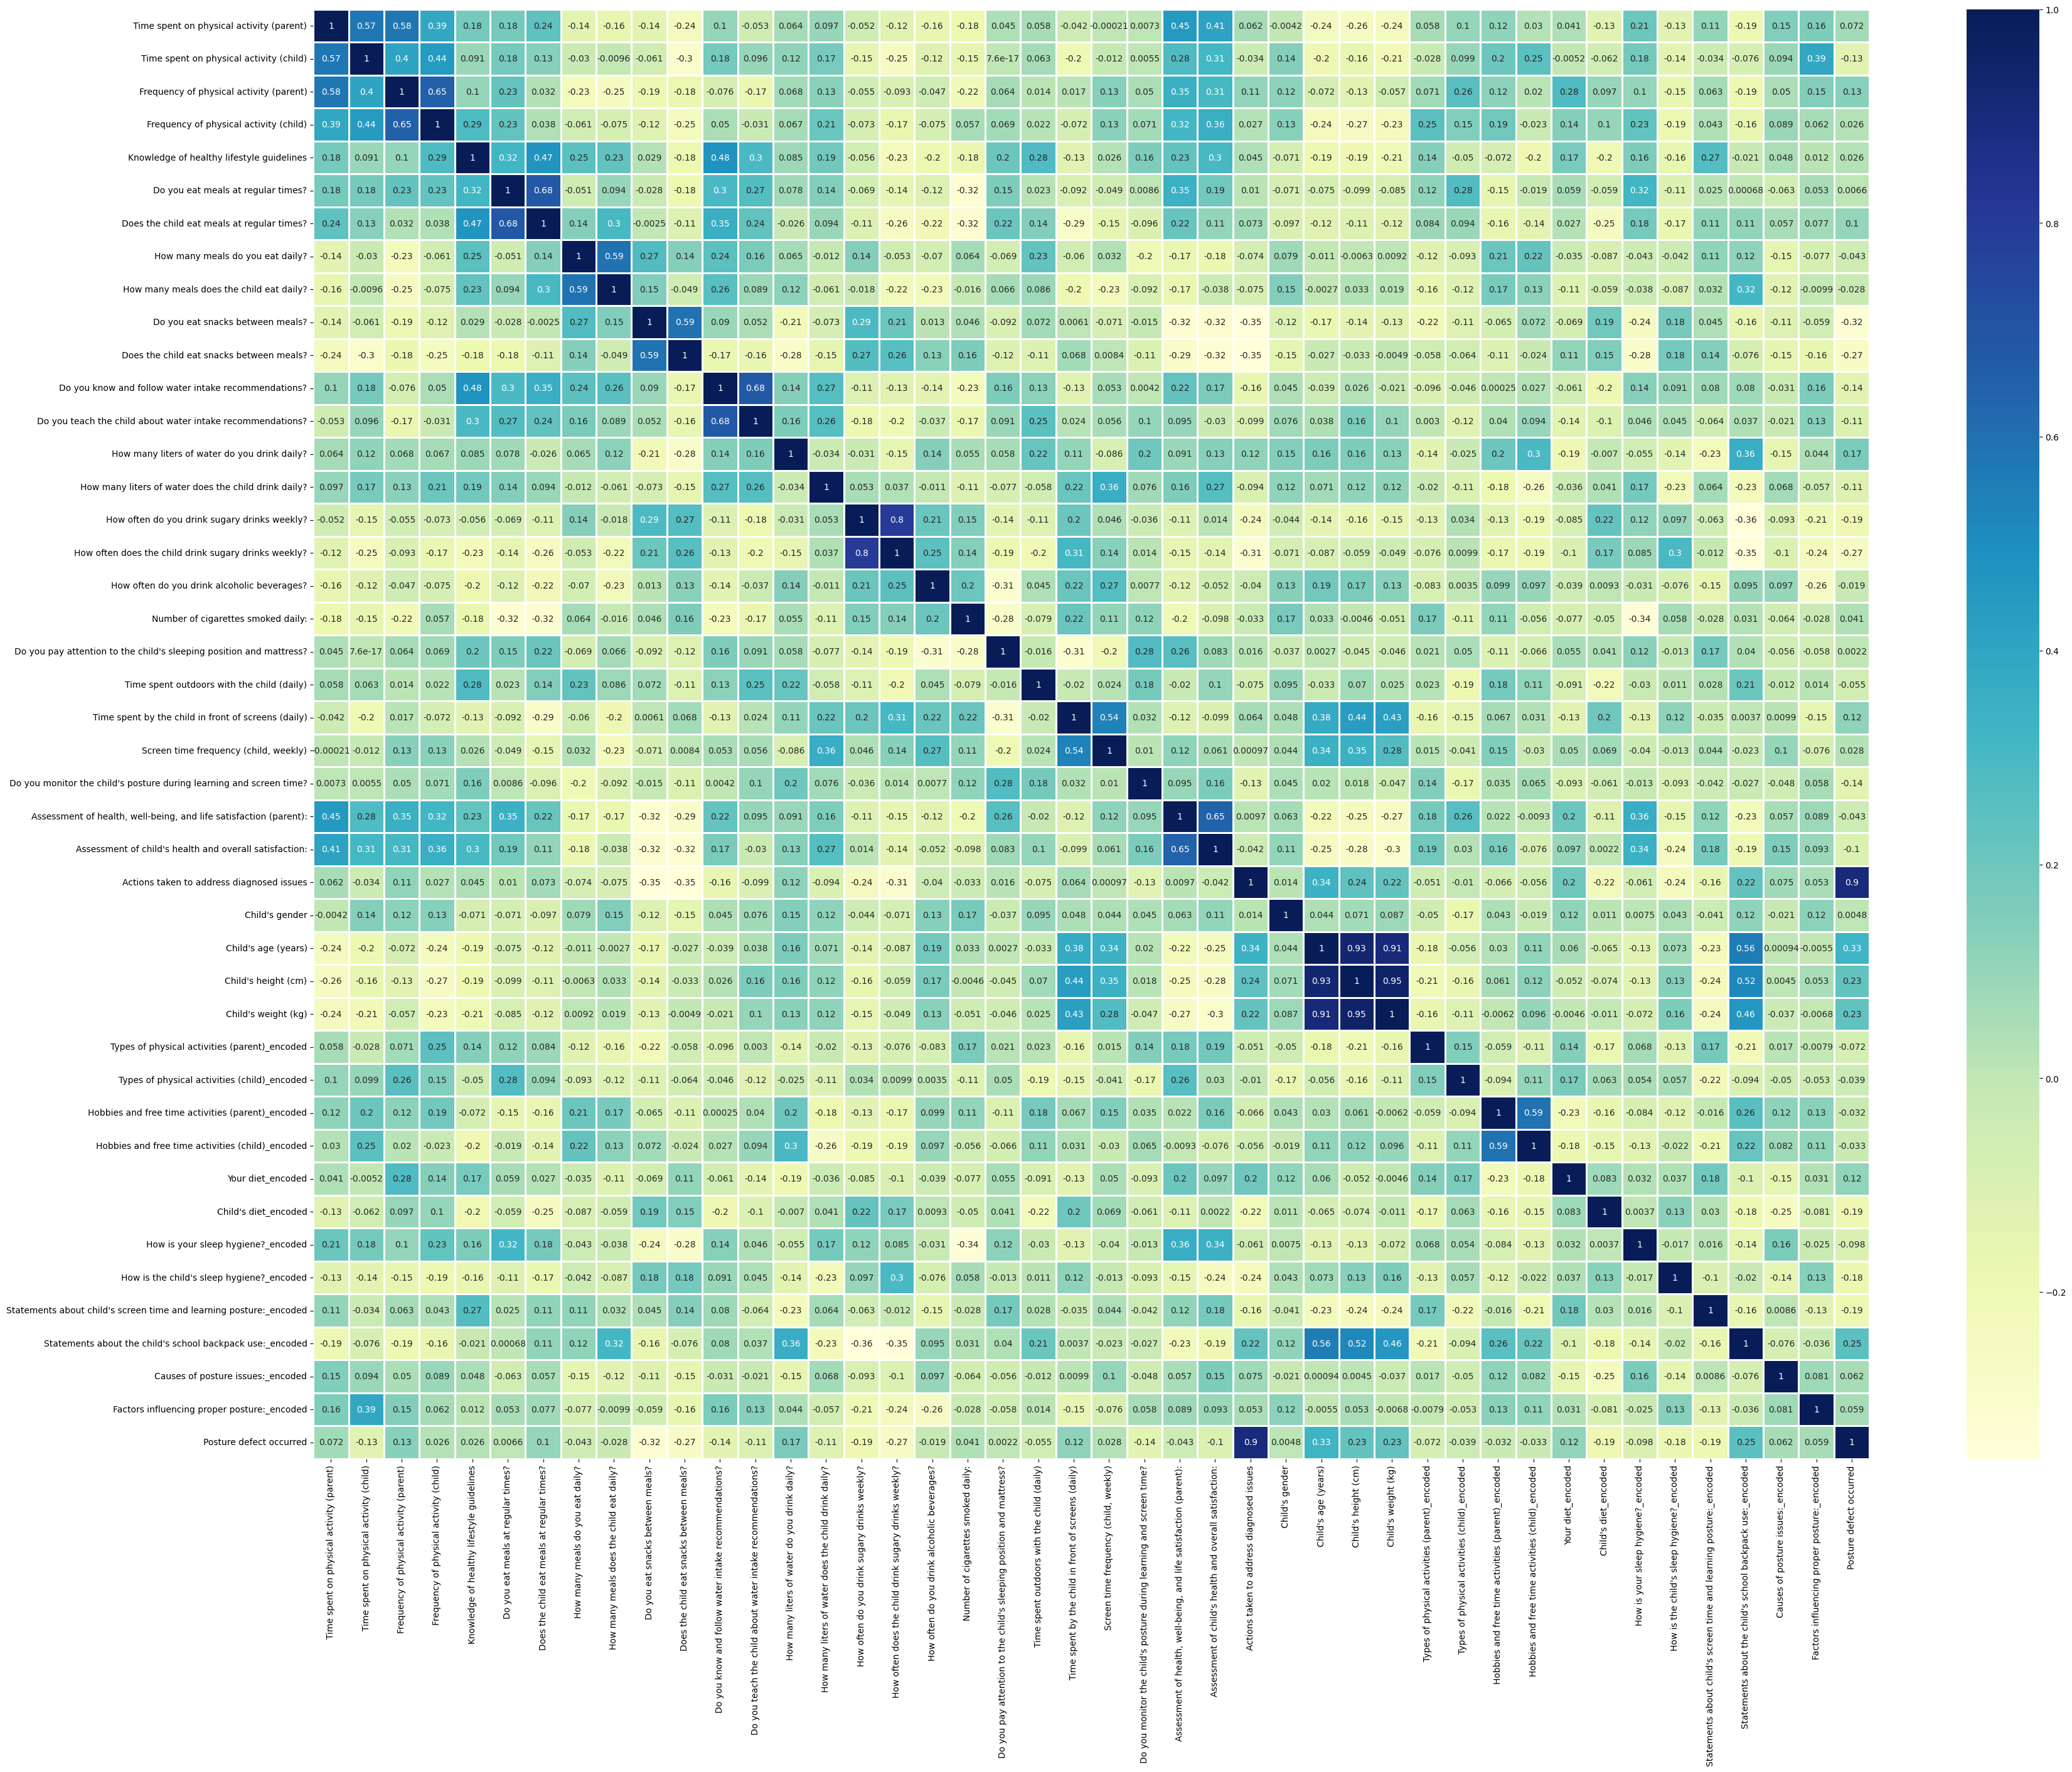

In [18]:
# Generating a heat map of correlation
plt.rcParams['figure.figsize']=(40,30)
sns.heatmap(train.corr(), annot=True, linewidths=1, cmap="YlGnBu");

### Building models

#### Basic model

In [19]:
X = train[["Actions taken to address diagnosed issues"]].values
y = train["Posture defect occurred"].values

In [20]:
def train_and_predict(model, X, y, test_size=0.33):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018)
    
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test) 

    return accuracy_score(y_test, y_pred)

In [21]:
train_and_predict(DummyClassifier(strategy = 'stratified'), X, y, test_size=0.33)

0.36666666666666664

#### Logistic Rgresion

In [22]:
train_and_predict(LogisticRegression(), X, y)

0.9333333333333333

### Evaluation of models

### Conclusions and next steps